In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/hotel_bookings.csv")


In [178]:
df.shape

(119390, 32)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [180]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- There are 488 missing values in country(object data type)

- There are 16340 missing values in agent(float)

- There are 112593 missing values in company(float)

- There are 4 missing values in children(float)

- The missing values has to be replaced by mean,mode or median as per the data type and if the missing values are not much for particular column:

-float --> mean(of no outliers) / median

-object -->Mode

-NOTE : For company the missing values are very high 112593 and actually the total no. of rows are 119390, so it is better to DROP IT.

In [181]:
##DROP THE COLUMN COMPANY
df=df.drop(["company"],axis=1)
#axis=1 means column

In [182]:
df.shape
#now no. of columns 31

(119390, 31)

-- Dealing with MISSING Values

In [183]:
#Finding median for children

median1=df["children"].median()
median1

0.0

In [184]:
#Replace all the missing/null values in childrean with meidan

df["children"].replace(np.nan,median1,inplace=True)

np means numpy
nan means not a number
so the numpy looks for null value(that nan) to replace with the median

In [185]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


NOTE: NO missing/null values in children column

In [186]:
median2=df["agent"].median
median2

<bound method NDFrame._add_numeric_operations.<locals>.median of 0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64>

In [187]:
median2=df["agent"].median()
median2

14.0

In [188]:
df["agent"].replace(np.nan,median2,inplace=True)
        #OR type as below(if inplace not used)
# df["agent"]=df["agent"].replace(np.nan,median2)

In [189]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

NOTE: NO missing/null values for agent only country is left.

Country has object data type so MODE will be used 

In [190]:
mode1=df["country"].mode().values[0]
mode1

'PRT'

What does mode().value[0] means??

to return single value

.mode()[0] will return the single value.. that is mode of features['Exterior1st'] And if you use only . mode().. you will get an error.. because mode() always returns a series regardless whether one value is returned.

In [191]:
df["country"]=df["country"].replace(np.nan,mode1)

In [192]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

no missing values

Data is prepared

In [193]:
##Check for duplicates

duplicate=df.duplicated()
print(duplicate.sum())

32020


In [194]:
##Dropping all the duplicates
df.drop_duplicates(inplace=True)

In [195]:
df.duplicated().sum()

0

all the duplicated have been dropped. so 0 duplicate values

In [196]:
df.shape
#Rows which were duplicated are removes

(87370, 31)

-Outliers

<Axes: >

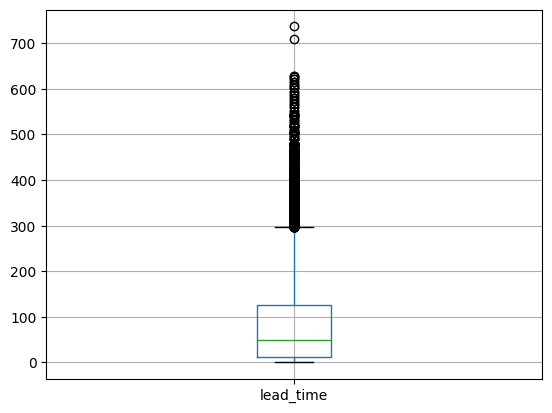

In [197]:
#take column to look for outliers
df.boxplot(column=["lead_time"])

#boxplot used to check for outliers

In [198]:
#to remove the outliers
#defining function
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-1.5*IQR
  upper_range=  Q3+1.5*IQR
  return lower_range, upper_range

In [199]:
##lead_time column
low_leadtime,high_leadtime=remove_outlier(df["lead_time"])
df["lead_time"]=np.where(df["lead_time"]<low_leadtime,low_leadtime,df["lead_time"])
df["lead_time"]=np.where(df["lead_time"]>high_leadtime,high_leadtime,df["lead_time"])
#np.where removes the conditions under the where brackets
#here outliers are being remooves

<Axes: >

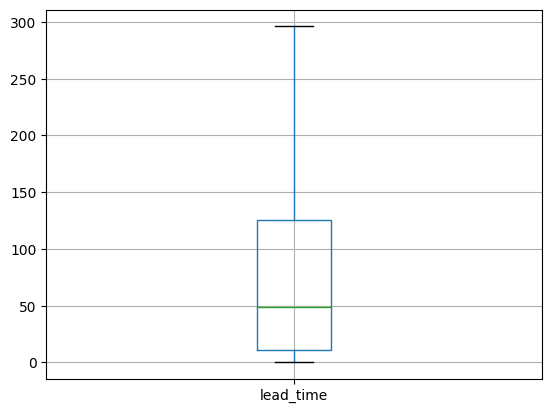

In [200]:
df.boxplot(["lead_time"])
#no outliers in this boxplot

<Axes: >

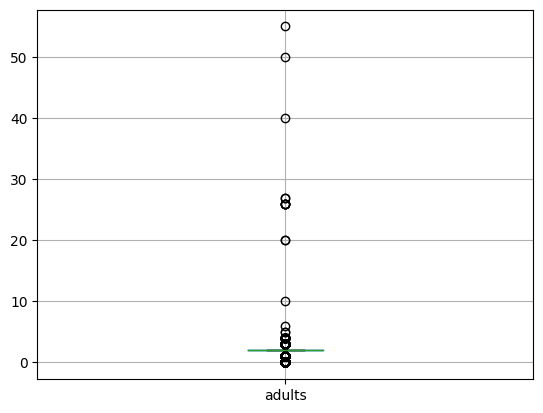

In [201]:
##adults column
df.boxplot(["adults"])
##have outliers

In [202]:
low_adults,high_adults=remove_outlier(df["adults"])
df["adults"]=np.where(df["adults"]<low_adults,low_adults,df["adults"])
df["adults"]=np.where(df["adults"]>high_adults,high_adults,df["adults"])


<Axes: >

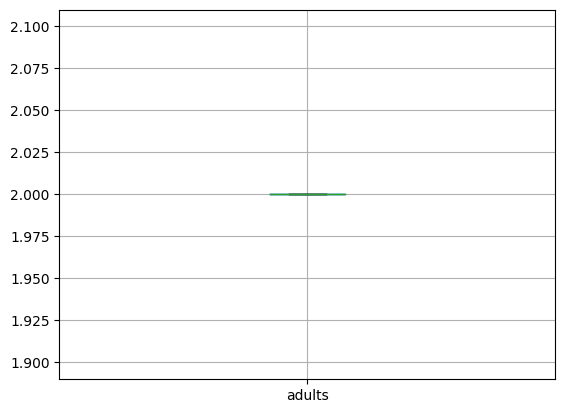

In [203]:
df.boxplot(["adults"])

<Axes: >

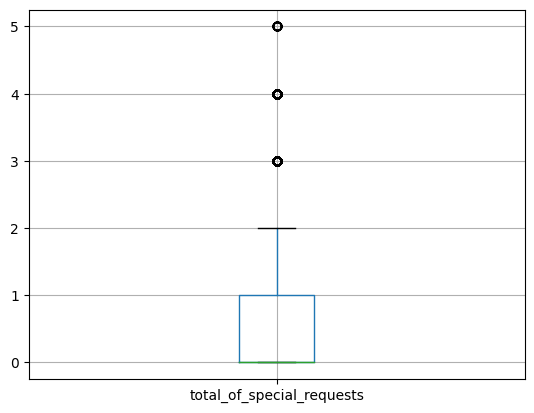

In [204]:
#total_of_special_requests column
df.boxplot(["total_of_special_requests"])

<Axes: >

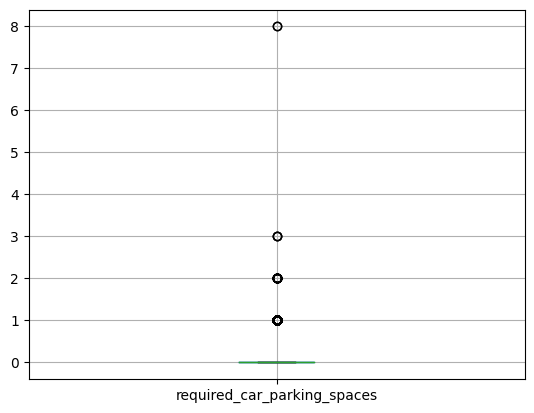

In [205]:
df.boxplot(["required_car_parking_spaces"])

ENCODING

In [206]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                         float64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                            float64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [207]:
dummies=pd.get_dummies(df[["hotel","arrival_date_month","reservation_status_date","reservation_status","customer_type","deposit_type","assigned_room_type","reserved_room_type","meal","country","market_segment","distribution_channel"]])
#Typing all the CATEGORICAL Columns inside the dummies()


In [208]:
dummies.head()
#Every values in row changed to numbers for the categorical columns

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [209]:
df.head(10)
#for COMPARISON

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,296.0,2015,July,27,1,0,0,2.0,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,296.0,2015,July,27,1,0,0,2.0,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7.0,2015,July,27,1,0,1,2.0,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13.0,2015,July,27,1,0,1,2.0,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14.0,2015,July,27,1,0,2,2.0,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,07-03-2015
6,Resort Hotel,0,0.0,2015,July,27,1,0,2,2.0,...,0,No Deposit,14.0,0,Transient,107.0,0,0,Check-Out,07-03-2015
7,Resort Hotel,0,9.0,2015,July,27,1,0,2,2.0,...,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,07-03-2015
8,Resort Hotel,1,85.0,2015,July,27,1,0,3,2.0,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,05-06-2015
9,Resort Hotel,1,75.0,2015,July,27,1,0,3,2.0,...,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23.0,2015,July,27,1,0,4,2.0,...,0,No Deposit,240.0,0,Transient,123.0,0,0,Canceled,6/23/2015


NOte we had 2 types of hotels only in hotel columns,few countable months in arrival_date_month column.

Using pandas these all are numerical no.s; like city_hotel as 0 ans resort hotel as 1, etc

#ENCODING THE CATEGORICAL DATA

In [210]:
#making list of columns of the above categorical columns mentioned in the dummies
columns_not_encoded=["hotel","arrival_date_month","reservation_status_date","reservation_status","customer_type","deposit_type","assigned_room_type","reserved_room_type","meal","country","market_segment","distribution_channel"]

In [211]:
#concat() function is used to concatenate pandas objects along a particular axis with optional set logic along the other axes.
df=pd.concat([df,dummies],axis=1)
#concatenating the columns that have been converted into numerical type

In [212]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,Resort Hotel,0,296.0,2015,July,27,1,0,0,2.0,...,1,0,0,0,0,0,1,0,0,0
1,Resort Hotel,0,296.0,2015,July,27,1,0,0,2.0,...,1,0,0,0,0,0,1,0,0,0
2,Resort Hotel,0,7.0,2015,July,27,1,0,1,2.0,...,1,0,0,0,0,0,1,0,0,0
3,Resort Hotel,0,13.0,2015,July,27,1,0,1,2.0,...,0,0,0,0,0,1,0,0,0,0
4,Resort Hotel,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23.0,2017,August,35,30,2,5,2.0,...,0,0,1,0,0,0,0,0,1,0
119386,City Hotel,0,102.0,2017,August,35,31,2,5,2.0,...,0,0,0,1,0,0,0,0,1,0
119387,City Hotel,0,34.0,2017,August,35,31,2,5,2.0,...,0,0,0,1,0,0,0,0,1,0
119388,City Hotel,0,109.0,2017,August,35,31,2,5,2.0,...,0,0,0,1,0,0,0,0,1,0


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87370 entries, 0 to 119389
Columns: 1198 entries, hotel to distribution_channel_Undefined
dtypes: float64(5), int64(14), object(12), uint8(1167)
memory usage: 118.6+ MB


In [214]:
df.drop(columns_not_encoded,axis=1,inplace=True)
#dropping the columns which have object type data type and now retaining the encoded columns(which are numerical type)

In [215]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,0,296.0,2015,27,1,0,0,2.0,0.0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,296.0,2015,27,1,0,0,2.0,0.0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,7.0,2015,27,1,0,1,2.0,0.0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,13.0,2015,27,1,0,1,2.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,14.0,2015,27,1,0,2,2.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23.0,2017,35,30,2,5,2.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
119386,0,102.0,2017,35,31,2,5,2.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119387,0,34.0,2017,35,31,2,5,2.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119388,0,109.0,2017,35,31,2,5,2.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [216]:
df.info()
#Now we have only NUMERICAL ATTRIBUTES

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87370 entries, 0 to 119389
Columns: 1186 entries, is_canceled to distribution_channel_Undefined
dtypes: float64(5), int64(14), uint8(1167)
memory usage: 110.6 MB
